In [15]:
import sys
sys.path.insert(0, "C:\\Users\\Paul Valcke\\Documents\\GitHub\\CHIMES")
import chimes as chm

import numpy as np

# WHAT WE WANT

## MONOSECTORAL 
- Goodwin state of the system 
- CES-Goodwin state 
- Accessibility dynamics with arbitrary theory on investment 

## MULTISECTORAL 
- N Goodwin synchronized in parrallel
- N Goodwin with arbitrary shapes
- N Goodwin arbitrary far from equilibrium
- Changing each parameter to see the impact on stability 


# Monosectoral

In [59]:
hub=chm.Hub('E-CHIMES')
hub.set_dparam(**hub.supplements['generateNgoodwin'](5) )

#hub.get_summary()
hub.set_dparam('Tmax',100)
hub.run()
#chm.plots.XY(hub,'omega','employmentAGG')

hub.plot(filters_key=['omega','employment'],separate_variables={'':['omega']})

The following fields are defined in the model but not it the library :
	- statevar: ['v', 'GammaY', 'TakenforIr', 'Idelta', 'Ilever']
	- parameter: ['apond', 'epsilonV', 'chiv', 'chiV', 'chiY', 'Phi0', 'Phi1', 'flambda']
The following fields are identified as parameters :
	- independant : ['delta', 'sigma', 'z', 'nu', 'Cpond', 'Delta', 'k0', 'k1']
	- function of other parameters : []
The following variables are identified as auxilliary :
	 - differential : ['time']
	 - state variable : ['ROC', 'c', 'mu', 'Kdelta', 'GammaY', 'TakenforIr', 'Minter', 'Minvest', 'rDh', 'g', 'reldotv', 'reloverinvest']
The following order has been determined for functions:
	- parameter: ['nt']
	- statevar: ['w', 'a', 'u', 'Mgamma', 'Mxi', 'L', 'Y', 'v', 'Kdelta', 'GammaY', 'Minter', 'MtransactY', 'wL', 'rD', 'rDh', 'employment', 'xi', 'omega', 'gamma', 'rd', 'pi', 'ROC', 'c', 'mu', 'Shareholding', 'Idelta', 'W', 'employmentAGG', 'Phillips', 'kappa', 'reloverinvest', 'C', 'pC', 'Ilever', 'I', 'basket', 'ibas

Exception: 
You have a problem on your object sizes for Phillips (shape of kwargs:)
 [('employmentAGG', (1, 1, 1, 1)), ('Phi0', (1, 1, 5, 1)), ('Phi1', (1, 1, 5, 1))] 
 could not broadcast input array from shape (1,1,5,1) into shape (1,1,1,1)
ALLOCATION CANNOT BE DONE,CHECK YOUR MODEL FILE !

The following fields are defined in the model but not it the library :
	- statevar: ['v', 'GammaY', 'TakenforIr', 'Idelta', 'Ilever', 'flambda']
	- parameter: ['apond', 'epsilonV', 'chiv', 'chiV', 'chiY', 'Phi0', 'Phi1']
The following fields are identified as parameters :
	- independant : ['delta', 'sigma', 'z', 'nu', 'Cpond', 'Delta', 'k0', 'k1']
	- function of other parameters : []
The following variables are identified as auxilliary :
	 - differential : ['time']
	 - state variable : ['ROC', 'c', 'mu', 'Kdelta', 'GammaY', 'TakenforIr', 'Minter', 'Minvest', 'rDh', 'employmentAGG', 'g', 'reldotv', 'reloverinvest']
The following order has been determined for functions:
	- parameter: ['nt']
	- statevar: ['w', 'a', 'u', 'Mgamma', 'Mxi', 'L', 'Y', 'v', 'Kdelta', 'GammaY', 'Minter', 'MtransactY', 'wL', 'rD', 'rDh', 'employment', 'xi', 'omega', 'gamma', 'rd', 'pi', 'ROC', 'c', 'mu', 'Shareholding', 'Idelta', 'W', 'employmentAGG', 'flambda', 'kappa', 'reloverinvest', 'C', 'pC', 'Ilever', 'I',

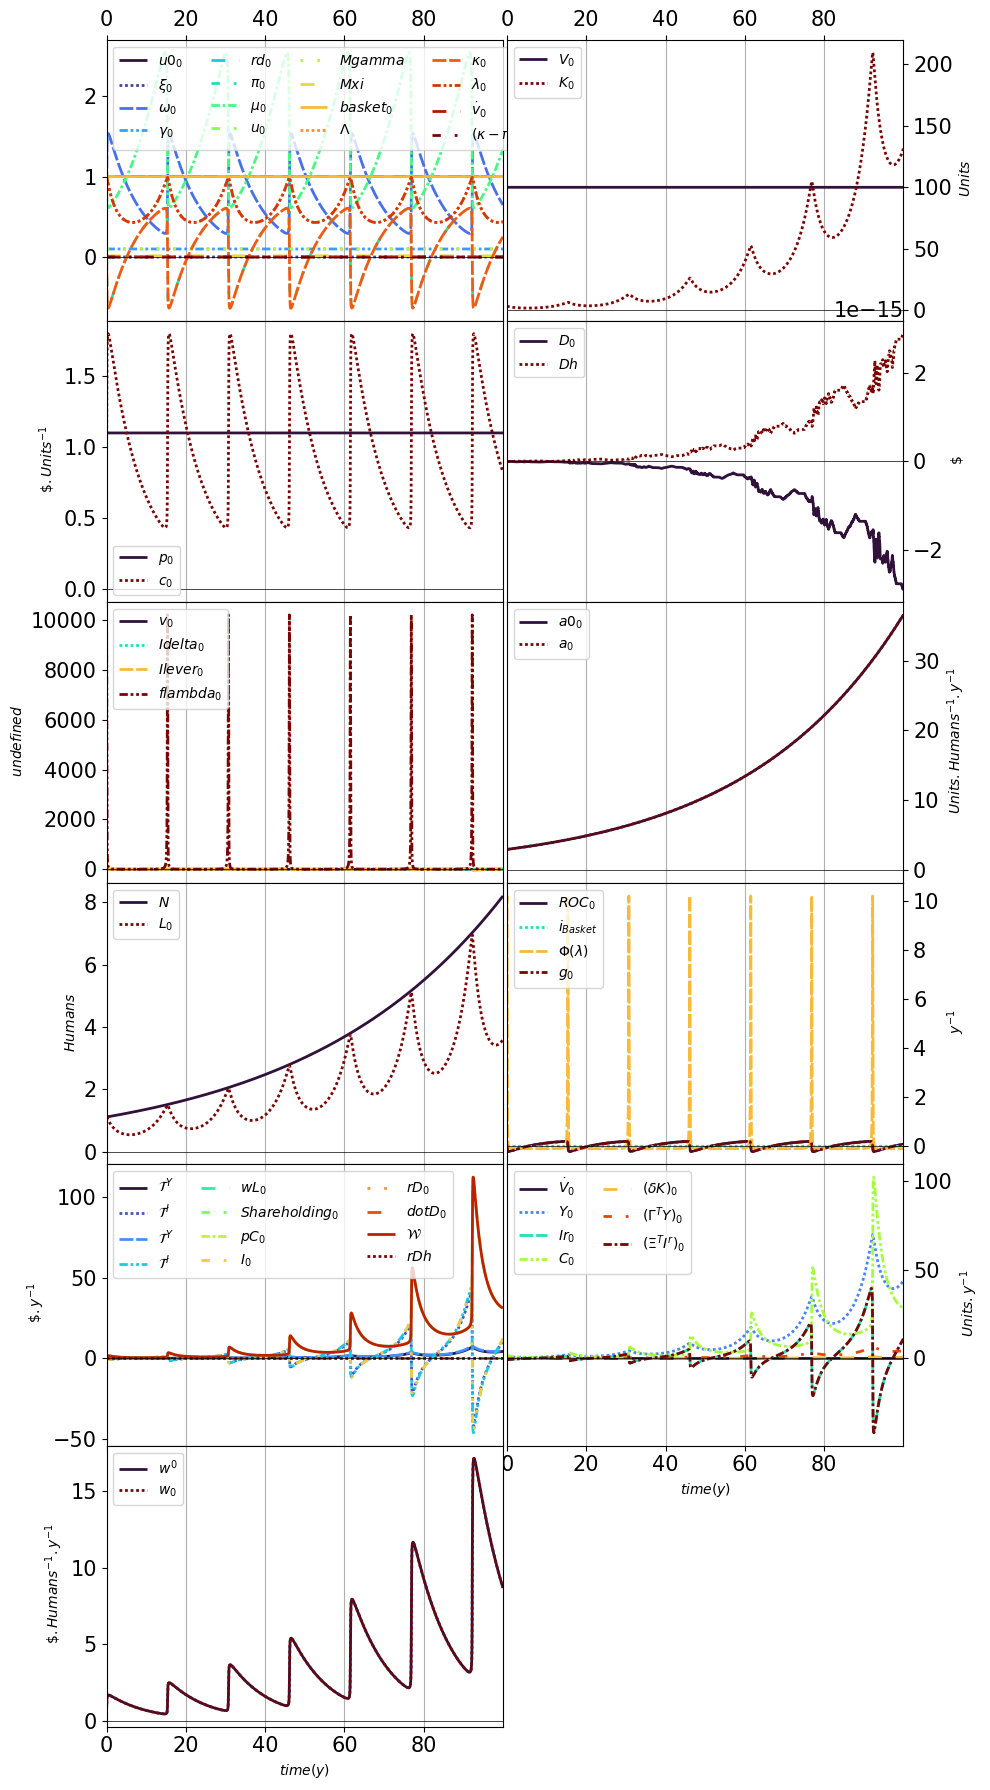

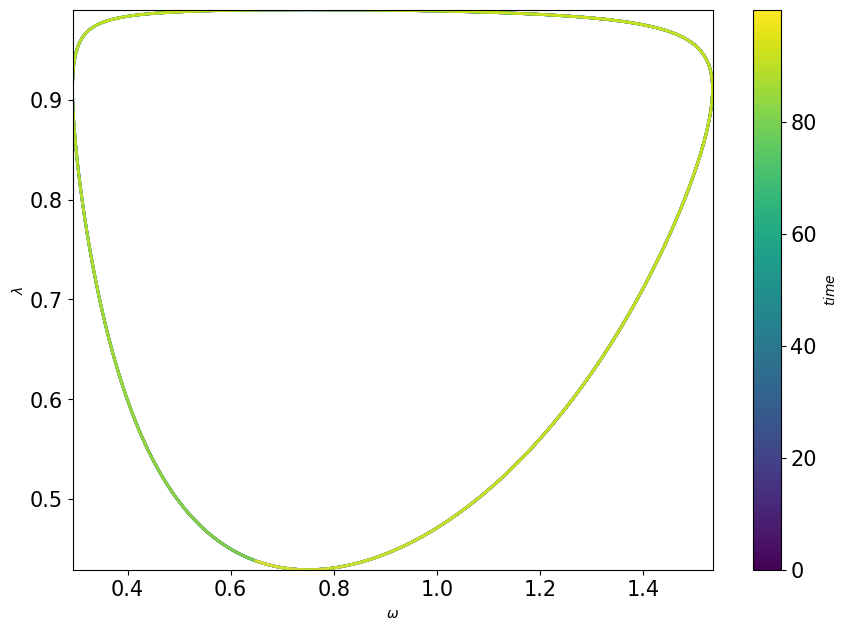

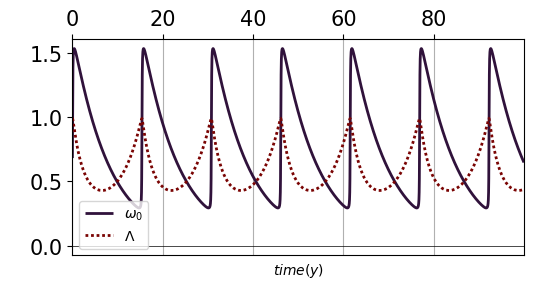

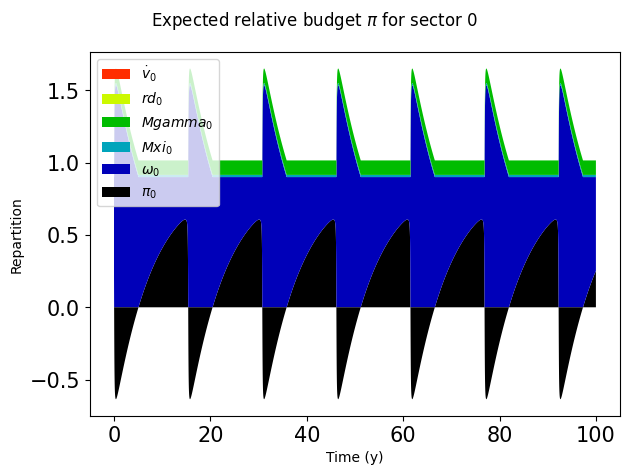

In [31]:
hub=chm.Hub('E-CHIMES')

dparam0 = hub.supplements['generateNgoodwin'](1) 
for k, v in dparam0.items():
    print(k,v)
#print(dparam0)
#dparam0['employment']= (dparam0['alpha']-dparam0['philinConst'])/dparam0['philinSlope'] # we calculate the equilibrium employment and will deduce K from it
dparam0['p'] = hub.supplements['pForROC'](dparam0) # we calculate prices to force the return on capital to force steady growth
K= hub.supplements['Kfor0dotV'](dparam0) # Scaling of K between sectors
dparam0['K']=K*dparam0['employment']*dparam0['N']/np.sum(K/dparam0['a']) # homotetic scaling for employment and N


# OUT OF EQUILIBRIUM
dparam0['K']*=1.1
dparam0['p']*=1.1


hub.set_dparam(**dparam0)
hub.set_dparam(**{'dt':0.01,
                  'Tmax':100,
                  'CESexp':10000})
hub.run()
hub.plot()

chm.plots.XY(hub,'omega','employment','time')
#pgm.plots.plotnyaxis(hub,[['AcY','AcI','AcC'],
#                      ['V']])
hub.plot(filters_key=['employmentAGG','omega'])
hub.supplements['PiRepartition'](hub)



Changing Dimensions: ['Nprod']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'K', 'p', 'z', 'apond', 'alpha', 'n', 'delta', 'eta', 'mu0', 'gammai', 'r', 'philinConst', 'philinSlope', 'Delta', 'k0', 'k1', 'CESexp', 'b', 'Xi', 'Gamma', 'Cpond', 'sigma', 'V', 'epsilonV']
Changes Ignored:['chi', 'A', 'kY', 'kI', 'kC', 'softmin', 'a', 'w', 'employment', 'Tmax', 'dt']
ISSUE : YOU CHANGE Nprod while Xi has specific values on it
ISSUE : YOU CHANGE Nprod while Gamma has specific values on it
Now Nprod has 3 sectors with names ['0', '1', '2']
Identified CESexp as a value change on all axes

time step 1000 / 1000
CAREFUL IT CAN ONLY WORKS ON ECHIMES RELATED MODELS


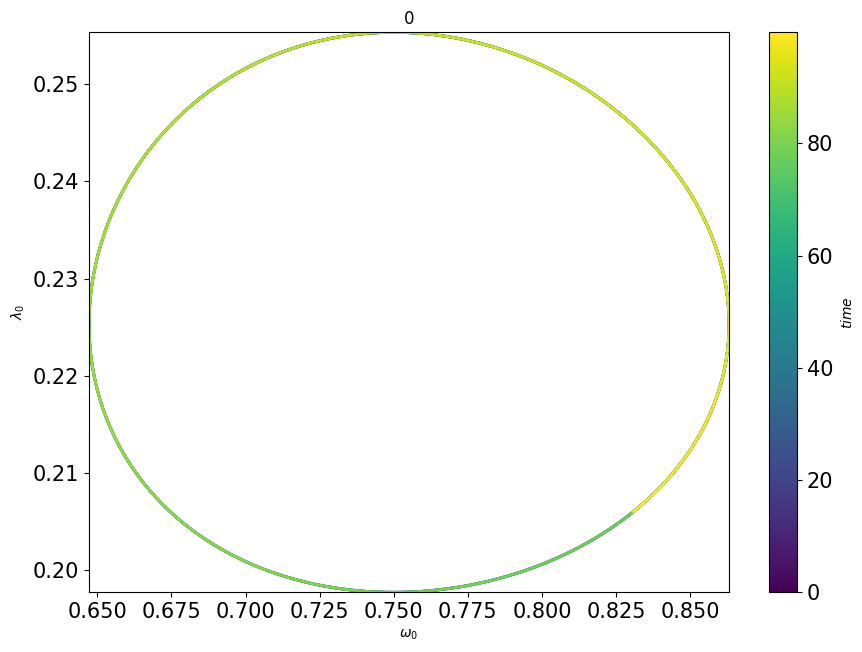

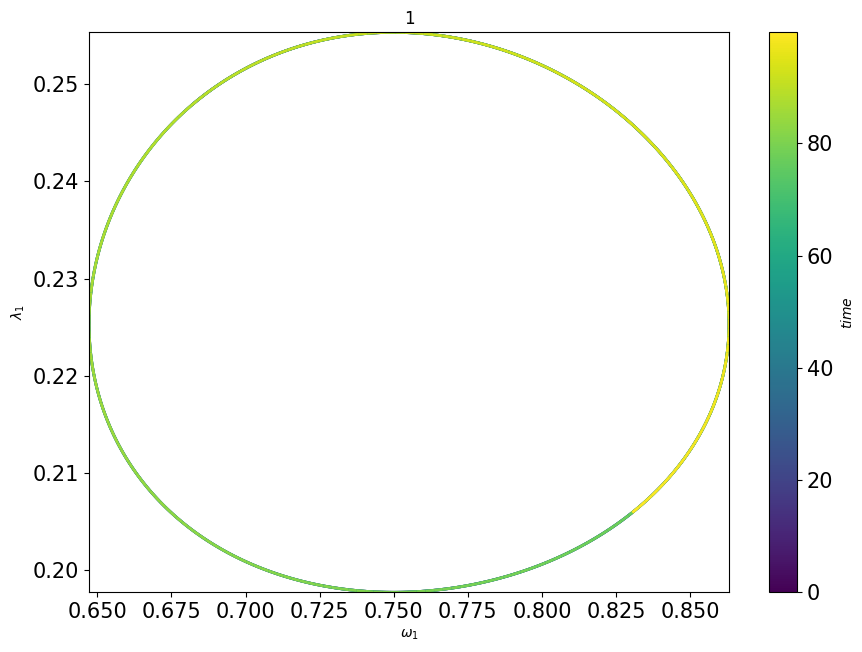

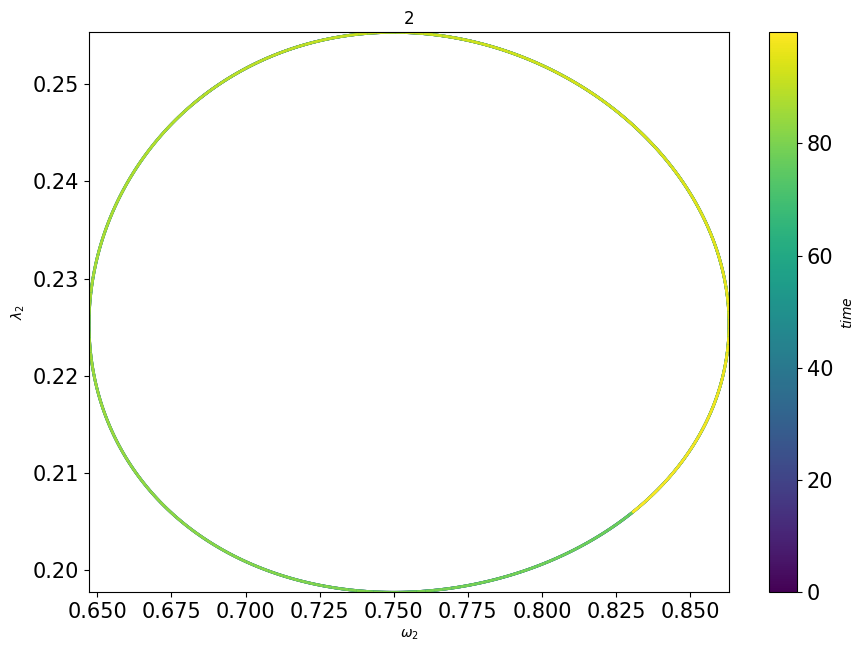

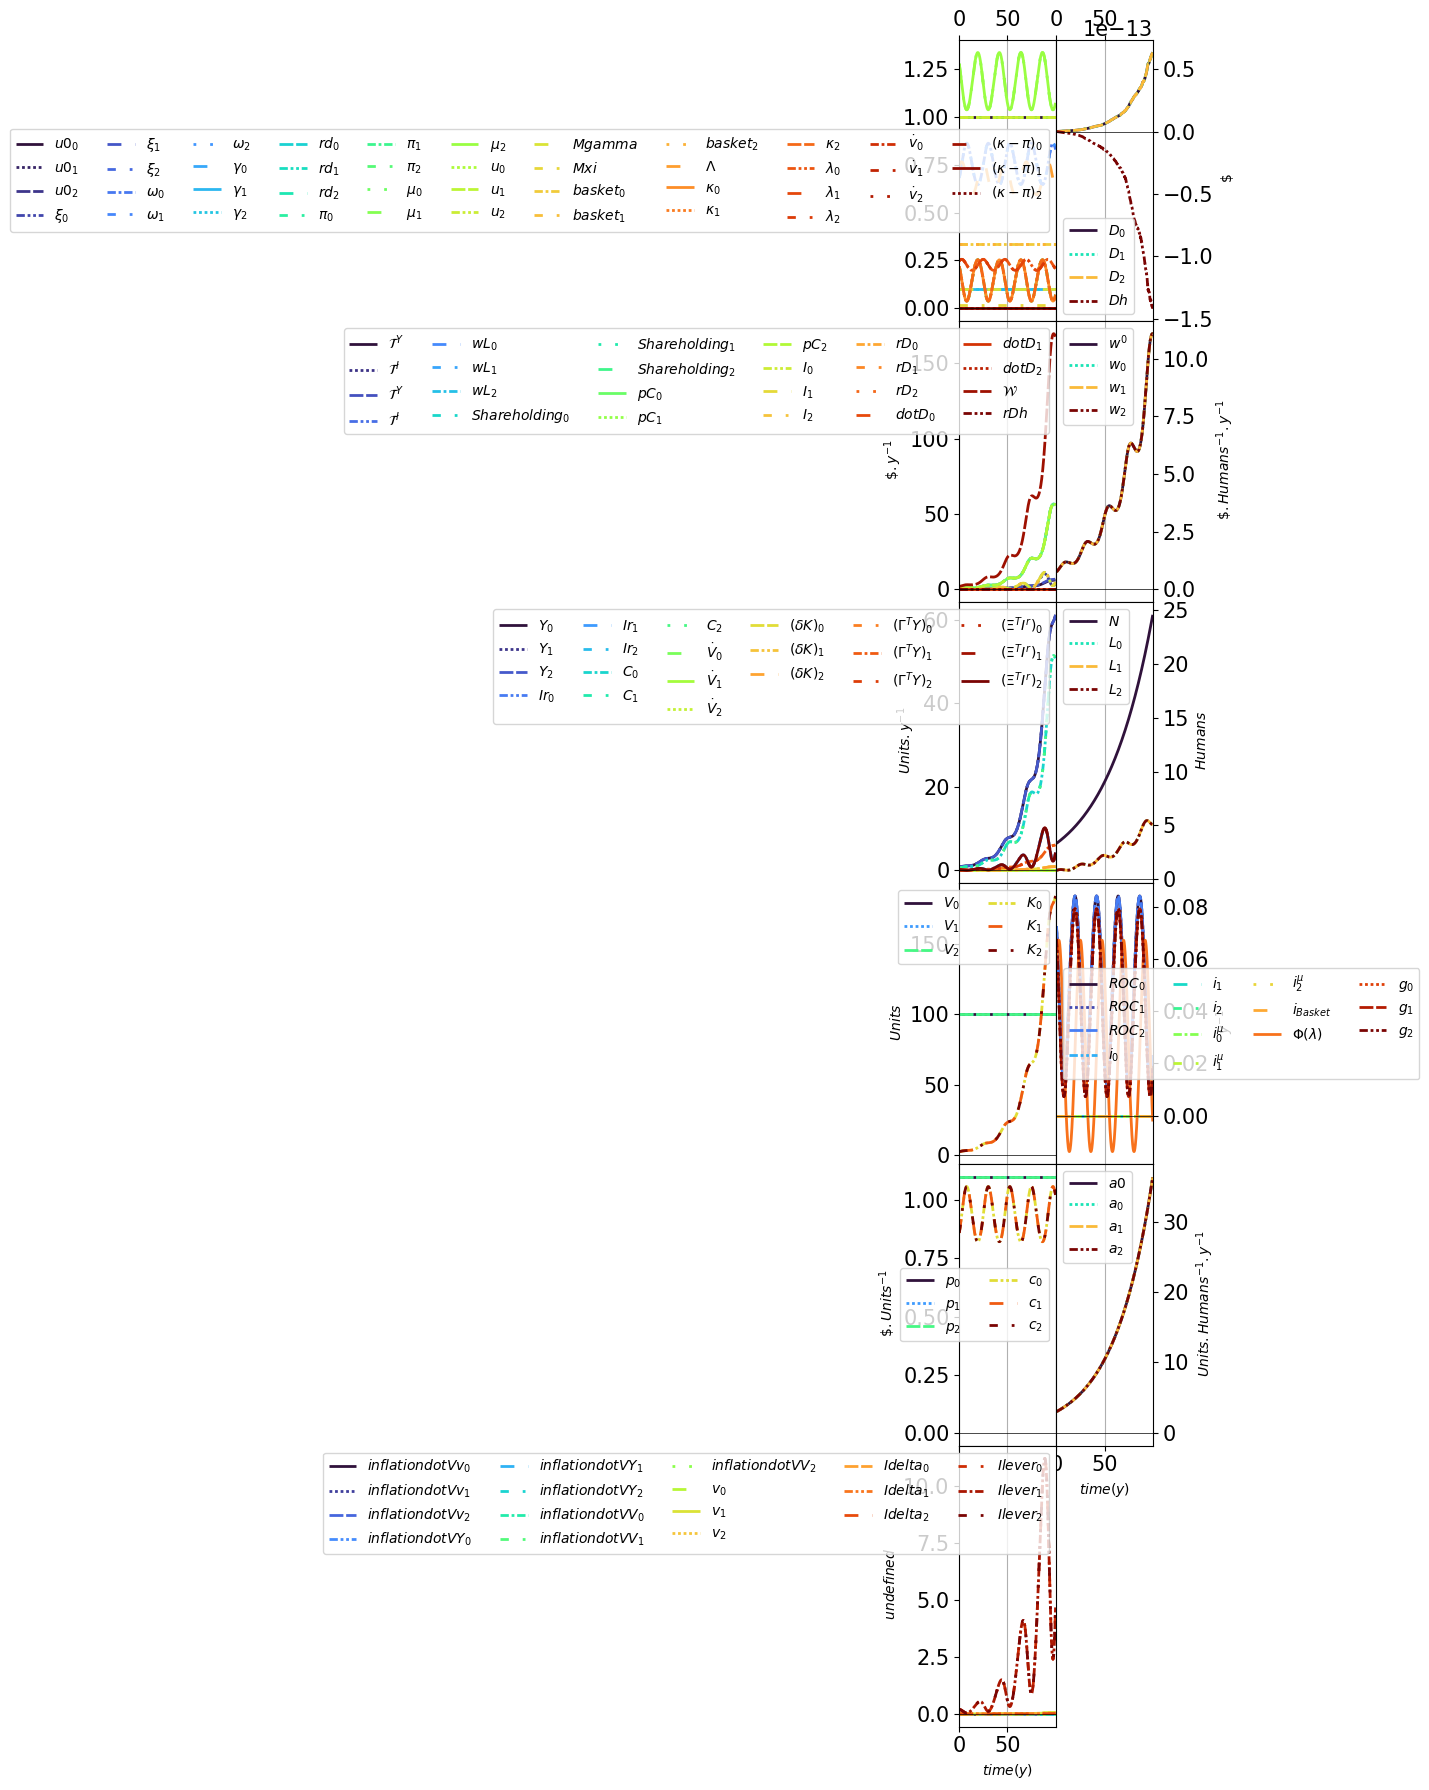

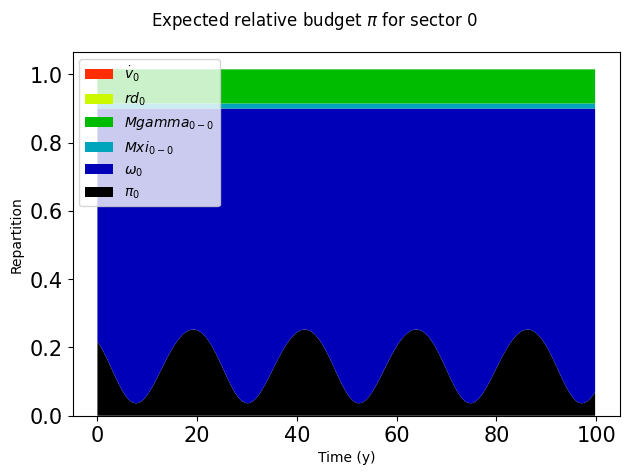

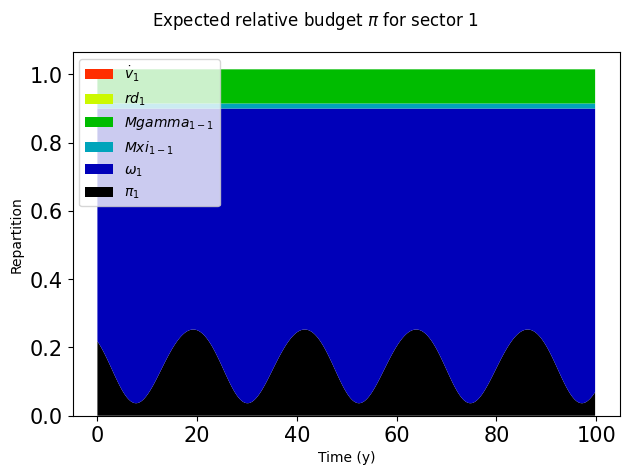

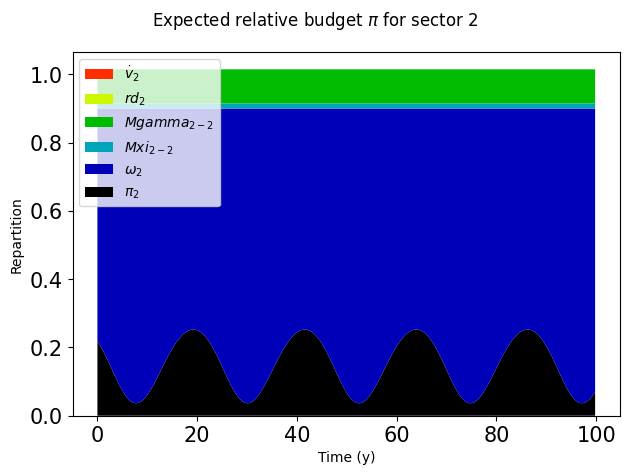

In [8]:

# SCALING TO THE EQUILIBRIUM
dparam0 = hub.supplements['generateNgoodwin'](1) 
dparam0
dparam0['employment']= (dparam0['alpha']-dparam0['philinConst'])/dparam0['philinSlope'] # we calculate the equilibrium employment and will deduce K from it
dparam0['p'] = hub.supplements['pForROC'](dparam0) # we calculate prices to force the return on capital to force steady growth
K= hub.supplements['Kfor0dotV'](dparam0) # Scaling of K between sectors
dparam0['K']=K*dparam0['employment']*dparam0['N']/np.sum(K/dparam0['a']) # homotetic scaling for employment and N

# DESCALE
dparam0['K']*=1.1
dparam0['p']*=1.1
dparam0['CESexp']=100
dparam0['Tmax']=100
hub.set_dparam(**dparam0,verb=True) 

#########################################
hub.run()
chm.plots.Sankey(hub,t=50)

for sect in dparam0['Nprod']:
    chm.plots.XY(hub,['omega',sect],['employment',sect],title=sect)
hub.plot()
hub.supplements['PiRepartition'](hub)


Changing Dimensions: ['Nprod']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'K', 'p', 'z', 'apond', 'alpha', 'n', 'delta', 'eta', 'mu0', 'gammai', 'r', 'philinConst', 'philinSlope', 'Delta', 'k0', 'k1', 'CESexp', 'b', 'Xi', 'Gamma', 'Cpond', 'sigma', 'V', 'epsilonV']
Changes Ignored:['chi', 'A', 'kY', 'kI', 'kC', 'softmin', 'a', 'w', 'employment', 'Tmax', 'dt']
Now Nprod has 3 sectors with names ['0', '1', '2']

time step 1000 / 1000


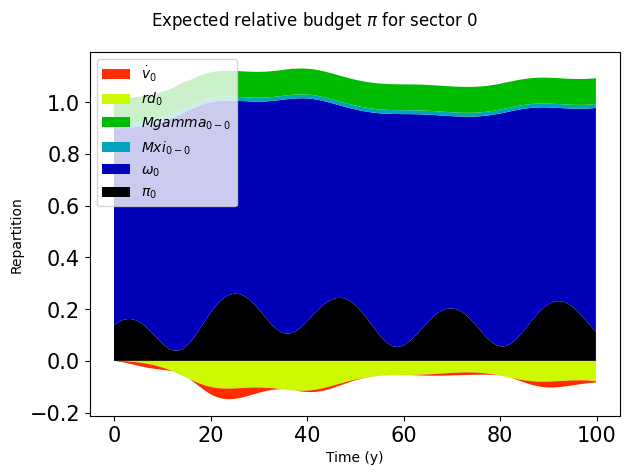

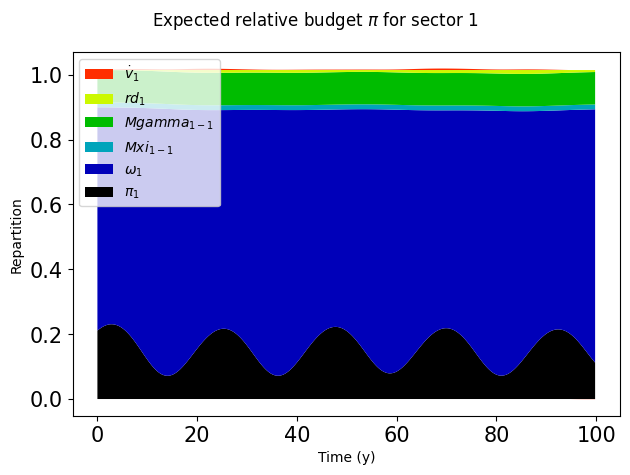

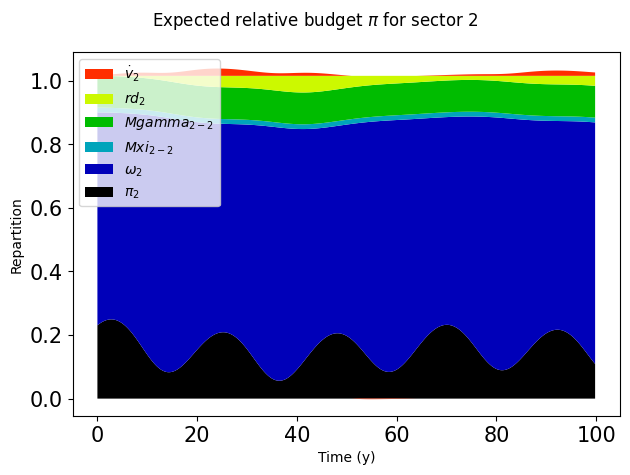


Changing Dimensions: ['Nprod']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'K', 'p', 'z', 'apond', 'alpha', 'n', 'delta', 'eta', 'mu0', 'gammai', 'r', 'philinConst', 'philinSlope', 'Delta', 'k0', 'k1', 'CESexp', 'b', 'Xi', 'Gamma', 'Cpond', 'sigma', 'V', 'epsilonV']
Changes Ignored:['chi', 'A', 'kY', 'kI', 'kC', 'softmin', 'a', 'w', 'employment', 'Tmax', 'dt']
Now Nprod has 3 sectors with names ['0', '1', '2']

time step 1000 / 1000


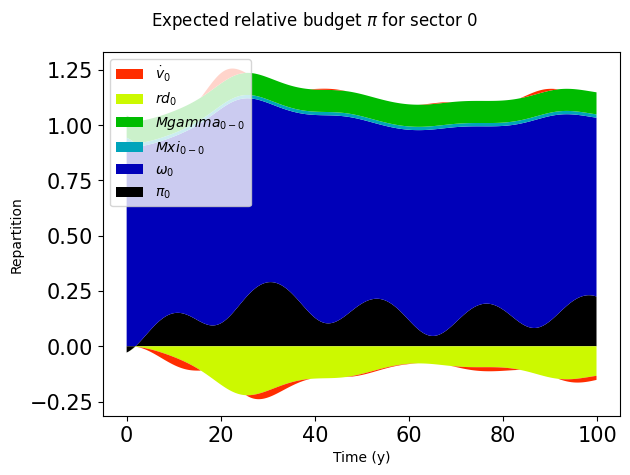

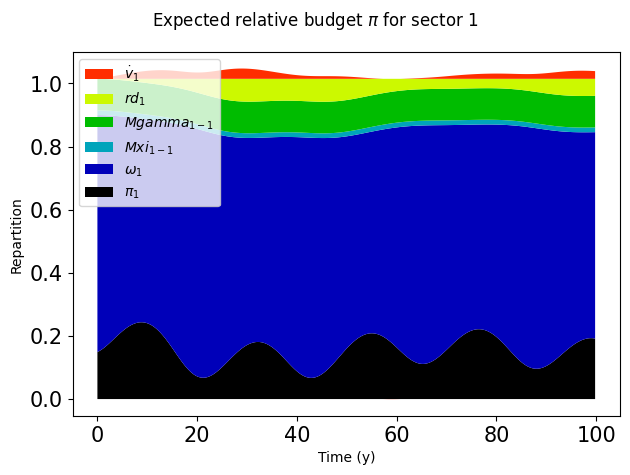

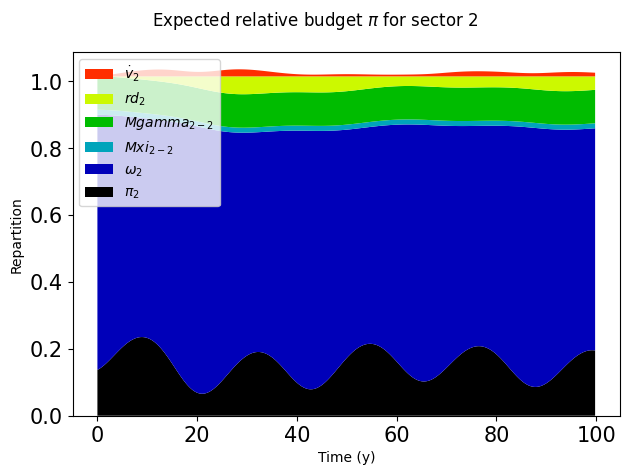


Changing Dimensions: ['Nprod']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'K', 'p', 'z', 'apond', 'alpha', 'n', 'delta', 'eta', 'mu0', 'gammai', 'r', 'philinConst', 'philinSlope', 'Delta', 'k0', 'k1', 'CESexp', 'b', 'Xi', 'Gamma', 'Cpond', 'sigma', 'V', 'epsilonV']
Changes Ignored:['chi', 'A', 'kY', 'kI', 'kC', 'softmin', 'a', 'w', 'employment', 'Tmax', 'dt']
Now Nprod has 3 sectors with names ['0', '1', '2']

time step 1000 / 1000


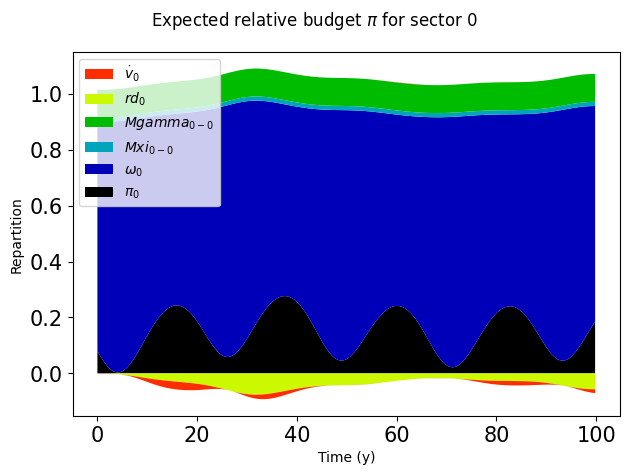

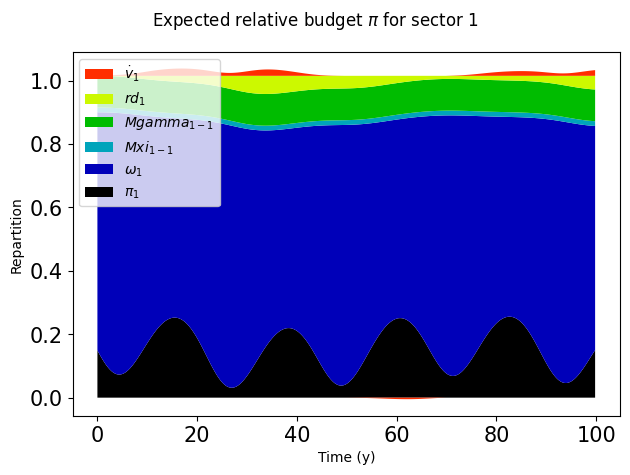

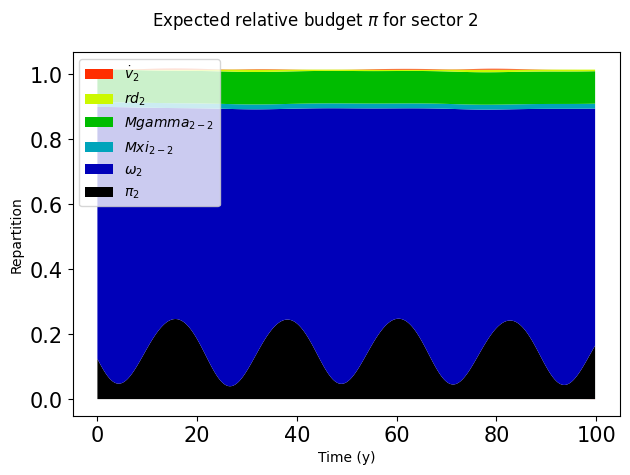


Changing Dimensions: ['Nprod']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'K', 'p', 'z', 'apond', 'alpha', 'n', 'delta', 'eta', 'mu0', 'gammai', 'r', 'philinConst', 'philinSlope', 'Delta', 'k0', 'k1', 'CESexp', 'b', 'Xi', 'Gamma', 'Cpond', 'sigma', 'V', 'epsilonV']
Changes Ignored:['chi', 'A', 'kY', 'kI', 'kC', 'softmin', 'a', 'w', 'employment', 'Tmax', 'dt']
Now Nprod has 3 sectors with names ['0', '1', '2']

time step 1000 / 1000


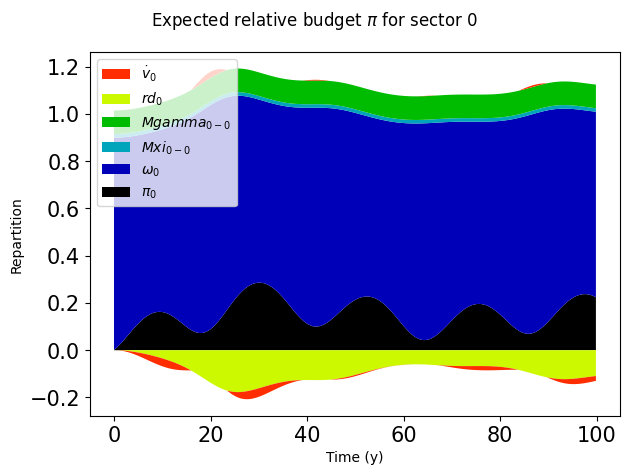

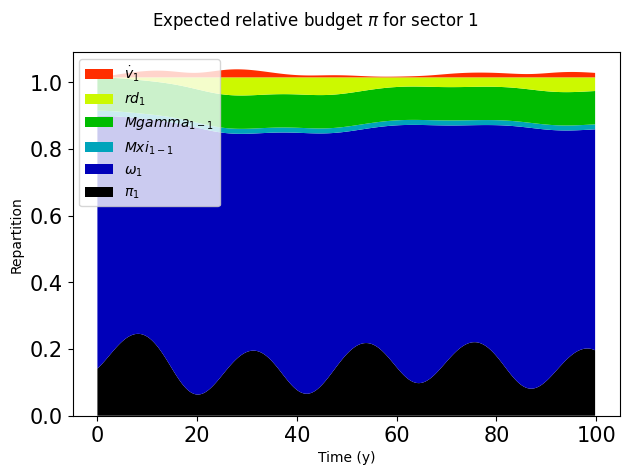

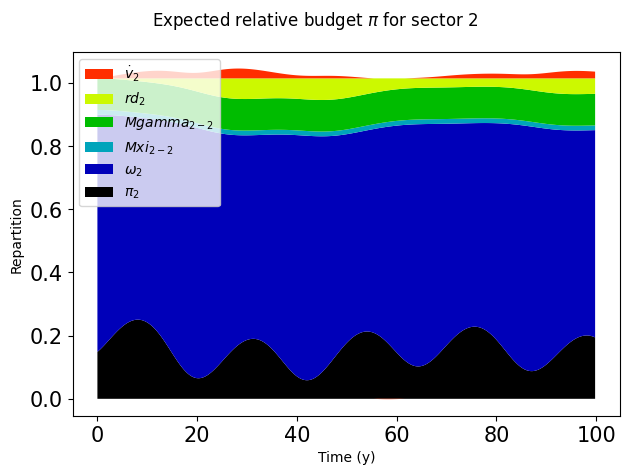


Changing Dimensions: ['Nprod']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'K', 'p', 'z', 'apond', 'alpha', 'n', 'delta', 'eta', 'mu0', 'gammai', 'r', 'philinConst', 'philinSlope', 'Delta', 'k0', 'k1', 'CESexp', 'b', 'Xi', 'Gamma', 'Cpond', 'sigma', 'V', 'epsilonV']
Changes Ignored:['chi', 'A', 'kY', 'kI', 'kC', 'softmin', 'a', 'w', 'employment', 'Tmax', 'dt']
Now Nprod has 3 sectors with names ['0', '1', '2']

time step 1000 / 1000


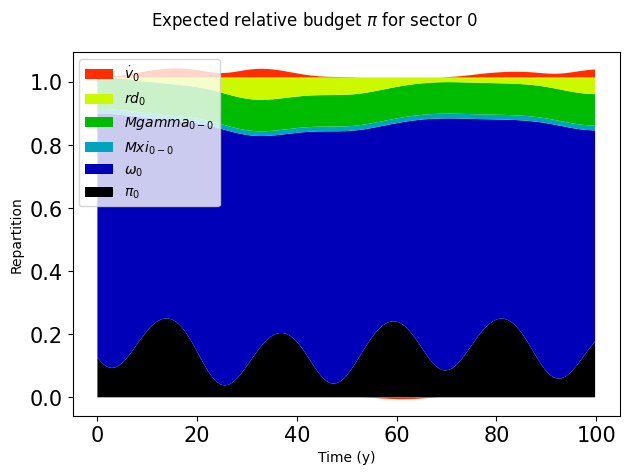

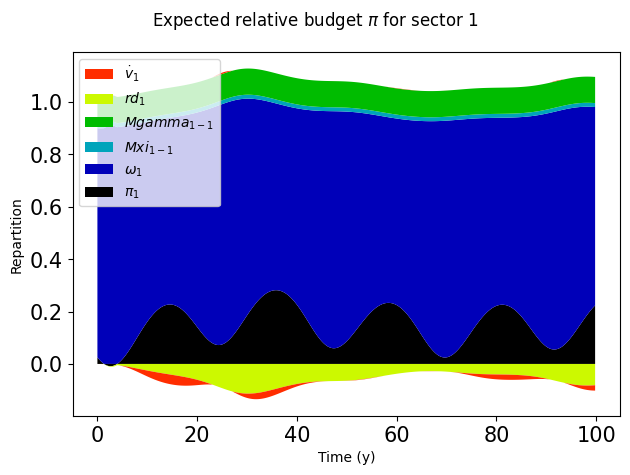

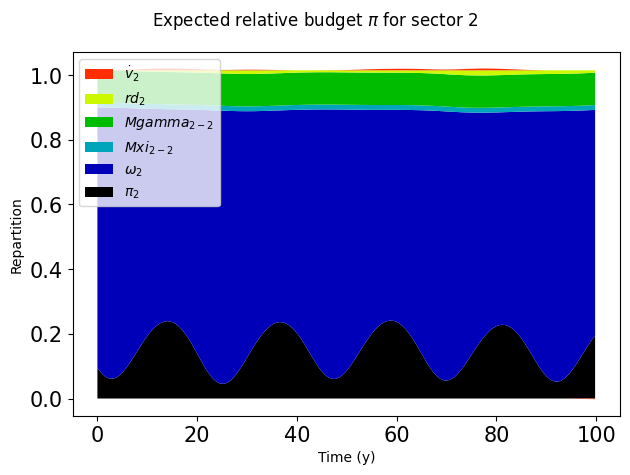

In [12]:
## At equilibrium
for _ in range(5):
    hub=chm.Hub('CHIMES0-alt',verb=False)

    # Generating a basic dictionnary of N sectors 
    dparam0 = hub.supplements['generateNgoodwin'](3) 

    # FORCING THE EQUILIBRIUM 
    dparam0['employment']= (dparam0['alpha']-dparam0['philinConst'])/dparam0['philinSlope'] # we calculate the equilibrium employment and will deduce K from it
    dparam0['p'] = hub.supplements['pForROC'](dparam0) # we calculate prices to force the return on capital to force steady growth

    K= hub.supplements['Kfor0dotV'](dparam0) # Scaling of K between sectors
    dparam0['K']=K*dparam0['employment']*dparam0['N']/np.sum(K/dparam0['a']) # homotetic scaling for employment and N
    dparam0['V']=dparam0['K']*dparam0['A']*dparam0['epsilonV']
    #pprint(dparam0)

    # DESYNCHRONISATION 
    noise = np.random.normal(1,0.2,size=len(dparam0['Nprod']))
    dparam0['K']*= noise

    noise2 = np.random.normal(1,0.1,size=len(dparam0['Nprod']))
    dparam0['p']*= noise2 

    dparam0['Cpond']=noise/(len(dparam0['Nprod']))
    dparam0['Cpond']/=np.sum(dparam0['Cpond'])

    hub.set_dparam(**dparam0,verb=True) 
    hub.set_dparam('Tmax',100,verb=False) 

    hub.run()#N=1000)
    '''
    for sector in dparam0['Nprod']:
        pgm.plots.XYZ(hub,['omega',sector],
                        ['employment',sector],
                        ['rd',sector],
                        ['dotV',sector] )


    pgm.plots.XYZ(hub,['omega',dparam0['Nprod'][0]],
                        ['omega',dparam0['Nprod'][1]],
                        ['omega',dparam0['Nprod'][2]],
                        'time' )
    '''

    #pgm.plots.plotnyaxis(hub,[['omegacarac',dparam0['Nprod'][0]]])

    #chm.plots.plotnyaxis(hub,[[['employment',sect] for sect in dparam0['Nprod']]+['employmentAGG'] ,
    #                        [['omegacarac',sect] for sect in dparam0['Nprod']]   ])
    hub.supplements['PiRepartition'](hub)

